In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the the citipy module to determine city based on latitute and longitude.
from citipy import citipy

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sao filipe cv
hermanus za
east london za
puerto ayora ec
rikitea pf
ponta delgada pt
sao filipe cv
yumen cn
avarua ck
kapuskasing ca
barrow us
bambous virieux mu
novoagansk ru
kokomo us
belushya guba ru
jamestown sh
illoqqortoormiut gl
cidreira br
durazno uy
quatre cocos mu
kipini ke
leshukonskoye ru
vaini to
winneba gh
houma us
amot no
zabol ir
nikolskoye ru
kapaa us
mataura pf
rikitea pf
dubuque us
hilo us
albany au
hobart au
mahebourg mu
thompson ca
east london za
mecca sa
jamestown sh
port macquarie au
chuy uy
albany au
sao felix do xingu br
punta arenas cl
vila velha br
bluff nz
puerto ayora ec
barrow us
new norfolk au
roblin ca
waipawa nz
qaanaaq gl
clyde river ca
pevek ru
busselton au
albany au
svetlyy ru
jiangyou cn
vaini to
ribeira grande pt
jiddah sa
mataura pf
ponta delgada pt
mar del plata ar
rikitea pf
bur gabo so
hithadhoo mv
torbay ca
lagoa pt
russell nz
shush ir
severo-kurilsk ru
mataura pf
mafeteng ls
kharovsk ru
cape town za
taolanaro mg
kapaa us
albany au
cape town z

hermanus za
rikitea pf
barrow us
husavik is
daru pg
hithadhoo mv
yellowknife ca
jamestown sh
jalu ly
kavieng pg
samusu ws
halifax ca
ushuaia ar
bani do
east london za
grand-lahou ci
port alfred za
amderma ru
mataura pf
bredasdorp za
rikitea pf
sitka us
tarko-sale ru
muros es
hermanus za
albany au
tervel bg
tuatapere nz
mataura pf
kapaa us
ahipara nz
manokwari id
rikitea pf
ushuaia ar
longyearbyen sj
kapaa us
mys shmidta ru
chuy uy
atuona pf
rikitea pf
chokurdakh ru
rikitea pf
saint-francois gp
ushuaia ar
butaritari ki
ciudad bolivar ve
chokurdakh ru
bethel us
chapais ca
vaini to
dax fr
bethel us
busselton au
upernavik gl
geraldton au
albany au
rorvik no
prescott us
punta arenas cl
mataura pf
bredasdorp za
ushuaia ar
brazzaville cg
kavieng pg
okhansk ru
lubango ao
tuni in
dikson ru
georgetown sh
poltavka ru
puerto ayora ec
vaini to
egvekinot ru
bushehr ir
orlik ru
ushuaia ar
fort-shevchenko kz
hakkari tr
kayerkan ru
cairns au
torbat-e jam ir
vao nc
qinhuangdao cn
warqla dz
ushuaia ar
ah

thompson ca
kapaa us
mataura pf
rikitea pf
inhambane mz
tabou ci
buraydah sa
benguela ao
illapel cl
port alfred za
buala sb
souillac mu
jamestown sh
dingle ie
ushuaia ar
mporokoso zm
egvekinot ru
lasa cn
rikitea pf
ushuaia ar
camacha pt
airai pw
cape town za
khatanga ru
thompson ca
rikitea pf
port elizabeth za
dossor kz
uusikaupunki fi
garissa ke
waingapu id
busselton au
punta arenas cl
new norfolk au
fraserburgh gb
mizan teferi et
new norfolk au
bambanglipuro id
broken hill au
bengkulu id
barrow us
lasa cn
bafq ir
spirit river ca
kapaa us
busselton au
bealanana mg
narsaq gl
palabuhanratu id
lasa cn
bambous virieux mu
ancud cl


In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2fd7ffc182ddfd5e5642b347899b66cc


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ponta delgada
Processing Record 7 of Set 1 | yumen
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | kapuskasing
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | bambous virieux
Processing Record 12 of Set 1 | novoagansk
Processing Record 13 of Set 1 | kokomo
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | durazno
Processing Record 19 of Set 1 | quatre cocos
Processing Record 20 of Set 1 | kipini
Processing Record 21 of Set 1 | leshukonsk

Processing Record 37 of Set 4 | chokurdakh
Processing Record 38 of Set 4 | fallon
Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | lebu
Processing Record 41 of Set 4 | lolua
City not found. Skipping...
Processing Record 42 of Set 4 | bredasdorp
Processing Record 43 of Set 4 | turbat
Processing Record 44 of Set 4 | smoky lake
Processing Record 45 of Set 4 | tautira
Processing Record 46 of Set 4 | saint-philippe
Processing Record 47 of Set 4 | rosarito
Processing Record 48 of Set 4 | norman wells
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | saldanha
Processing Record 1 of Set 5 | caravelas
Processing Record 2 of Set 5 | denpasar
Processing Record 3 of Set 5 | daru
Processing Record 4 of Set 5 | tocopilla
Processing Record 5 of Set 5 | zhezkazgan
Processing Record 6 of Set 5 | grand gaube
Processing Record 7 of Set 5 | aranos
Processing Record 8 of Set 5 | sao jose da coroa grande
Processing Record 9 of Set 5 | geraldton
Processing Recor

Processing Record 30 of Set 8 | dax
Processing Record 31 of Set 8 | rorvik
Processing Record 32 of Set 8 | prescott
Processing Record 33 of Set 8 | brazzaville
Processing Record 34 of Set 8 | okhansk
Processing Record 35 of Set 8 | lubango
Processing Record 36 of Set 8 | tuni
Processing Record 37 of Set 8 | poltavka
Processing Record 38 of Set 8 | bushehr
Processing Record 39 of Set 8 | orlik
Processing Record 40 of Set 8 | fort-shevchenko
Processing Record 41 of Set 8 | hakkari
Processing Record 42 of Set 8 | kayerkan
Processing Record 43 of Set 8 | cairns
Processing Record 44 of Set 8 | torbat-e jam
Processing Record 45 of Set 8 | vao
Processing Record 46 of Set 8 | qinhuangdao
Processing Record 47 of Set 8 | warqla
City not found. Skipping...
Processing Record 48 of Set 8 | ahuimanu
Processing Record 49 of Set 8 | shepsi
Processing Record 50 of Set 8 | takoradi
Processing Record 1 of Set 9 | saint-georges
Processing Record 2 of Set 9 | mombetsu
Processing Record 3 of Set 9 | bonita 

Processing Record 16 of Set 12 | urucara
Processing Record 17 of Set 12 | kjopsvik
Processing Record 18 of Set 12 | port hardy
Processing Record 19 of Set 12 | puerto quijarro
Processing Record 20 of Set 12 | williams lake
Processing Record 21 of Set 12 | esna
Processing Record 22 of Set 12 | tygda
Processing Record 23 of Set 12 | slave lake
Processing Record 24 of Set 12 | isangel
Processing Record 25 of Set 12 | owando
Processing Record 26 of Set 12 | imperial
Processing Record 27 of Set 12 | sehithwa
Processing Record 28 of Set 12 | uspenka
Processing Record 29 of Set 12 | gao
Processing Record 30 of Set 12 | fortuna
Processing Record 31 of Set 12 | yarmouth
Processing Record 32 of Set 12 | cooma
Processing Record 33 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | bulgan
Processing Record 36 of Set 12 | ayr
Processing Record 37 of Set 12 | syracuse
Processing Record 38 of Set 12 | marcona
City not

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,70.93,73,4,9.37,CV,2021-03-09 16:53:57
1,Hermanus,-34.4187,19.2345,71.01,61,90,13.00,ZA,2021-03-09 16:53:58
2,East London,-33.0153,27.9116,73.40,78,0,11.50,ZA,2021-03-09 16:53:58
3,Puerto Ayora,-0.7393,-90.3518,84.20,70,0,6.91,EC,2021-03-09 16:53:58
4,Rikitea,-23.1203,-134.9692,80.28,84,2,16.11,PF,2021-03-09 16:53:59
5,Ponta Delgada,37.7333,-25.6667,59.00,88,20,14.97,PT,2021-03-09 16:53:59
6,Yumen,40.2833,97.2000,40.12,62,0,2.30,CN,2021-03-09 16:54:00
7,Avarua,-21.2078,-159.7750,78.80,83,75,10.36,CK,2021-03-09 16:54:00
8,Kapuskasing,49.4169,-82.4331,37.40,65,29,6.91,CA,2021-03-09 16:54:00
9,Barrow,71.2906,-156.7887,17.60,73,90,6.91,US,2021-03-09 16:54:01


In [22]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-03-09 16:53:57,14.8961,-24.4956,70.93,73,4,9.37
1,Hermanus,ZA,2021-03-09 16:53:58,-34.4187,19.2345,71.01,61,90,13.00
2,East London,ZA,2021-03-09 16:53:58,-33.0153,27.9116,73.40,78,0,11.50
3,Puerto Ayora,EC,2021-03-09 16:53:58,-0.7393,-90.3518,84.20,70,0,6.91
4,Rikitea,PF,2021-03-09 16:53:59,-23.1203,-134.9692,80.28,84,2,16.11
...,...,...,...,...,...,...,...,...,...
565,Bambanglipuro,ID,2021-03-09 16:57:58,-7.9500,110.2833,77.05,87,86,6.08
566,Broken Hill,AU,2021-03-09 16:57:59,-31.9500,141.4333,71.60,28,44,10.36
567,Bafq,IR,2021-03-09 16:57:59,31.6128,55.4107,66.63,22,1,3.13
568,Spirit River,CA,2021-03-09 16:58:00,55.7833,-118.8361,21.99,100,97,4.61


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

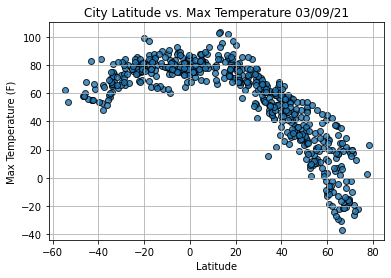

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

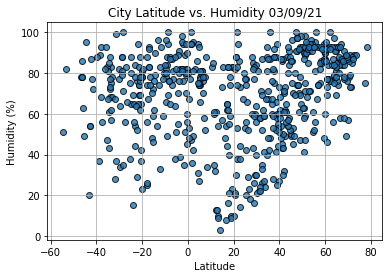

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

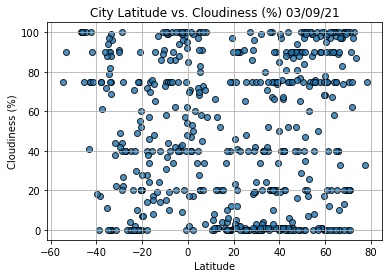

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

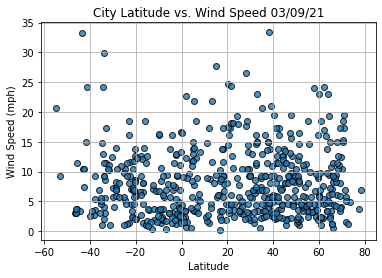

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

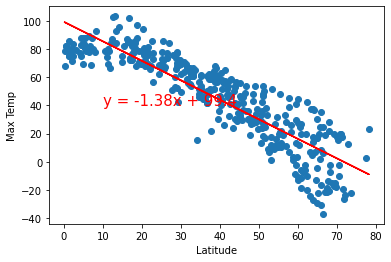

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

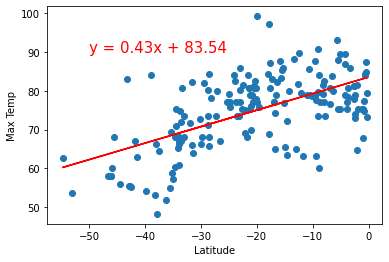

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

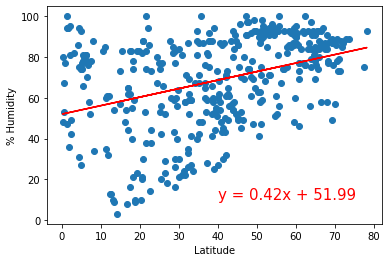

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

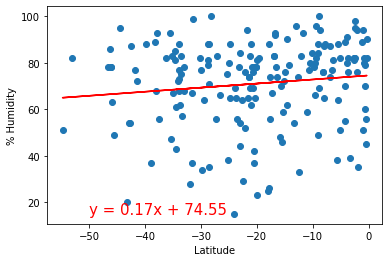

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

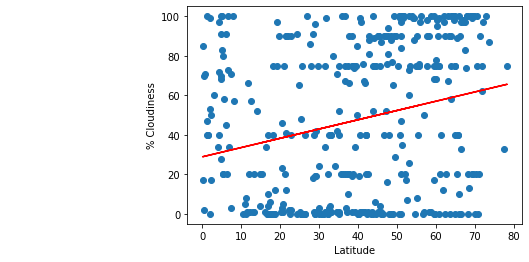

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

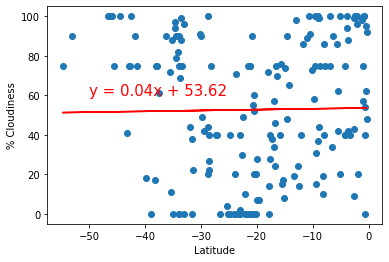

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

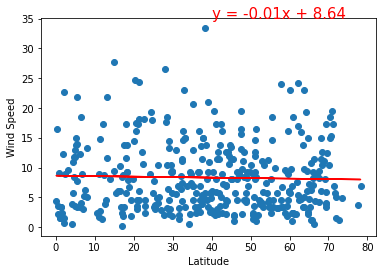

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

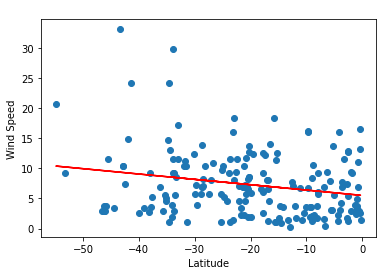

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))